In [2]:
!ls

Police_Department_Incidents_-_Previous_Year__2016_.csv	sample_data


In [0]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium


**Reading the Dataset**

In [7]:
# reading the dataset
data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv', error_bad_lines=False)

# checking the shape of the data
data.shape


b'Skipping line 9652: expected 13 fields, saw 14\nSkipping line 19289: expected 13 fields, saw 16\nSkipping line 24114: expected 13 fields, saw 14\nSkipping line 28993: expected 13 fields, saw 17\nSkipping line 43546: expected 13 fields, saw 14\nSkipping line 48440: expected 13 fields, saw 14\nSkipping line 58160: expected 13 fields, saw 16\n'
b'Skipping line 67876: expected 13 fields, saw 14\nSkipping line 72688: expected 13 fields, saw 17\nSkipping line 87152: expected 13 fields, saw 19\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(199744, 13)

In [8]:
# checking the head of the data
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403404791479,37.775420706711,"(37.775420706711, -122.403404791479)",1.200583e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403404791479,37.775420706711,"(37.775420706711, -122.403404791479)",1.200583e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856204292,37.7299809672996,"(37.7299809672996, -122.388856204292)",1.410593e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412970537591,37.7857883766888,"(37.7857883766888, -122.412970537591)",1.600137e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419671780296,37.7650501214668,"(37.7650501214668, -122.419671780296)",1.600027e+13


In [9]:
# describing the data
data.describe()

,PdId
count,1.997360e+05
mean,1.622235e+13
std,6.630752e+11
min,1.135121e+12
25%,1.603827e+13
50%,1.607761e+13
75%,1.660334e+13
max,9.910090e+13


In [10]:
# checking if there are any null values

data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          1
Time          3
PdDistrict    6
Resolution    5
Address       5
X             5
Y             6
Location      7
PdId          8
dtype: int64

In [11]:
# filling the missing value in PdDistrict using the mode values

data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace = True)

data.isnull().any().any()

True

## Data Visualization

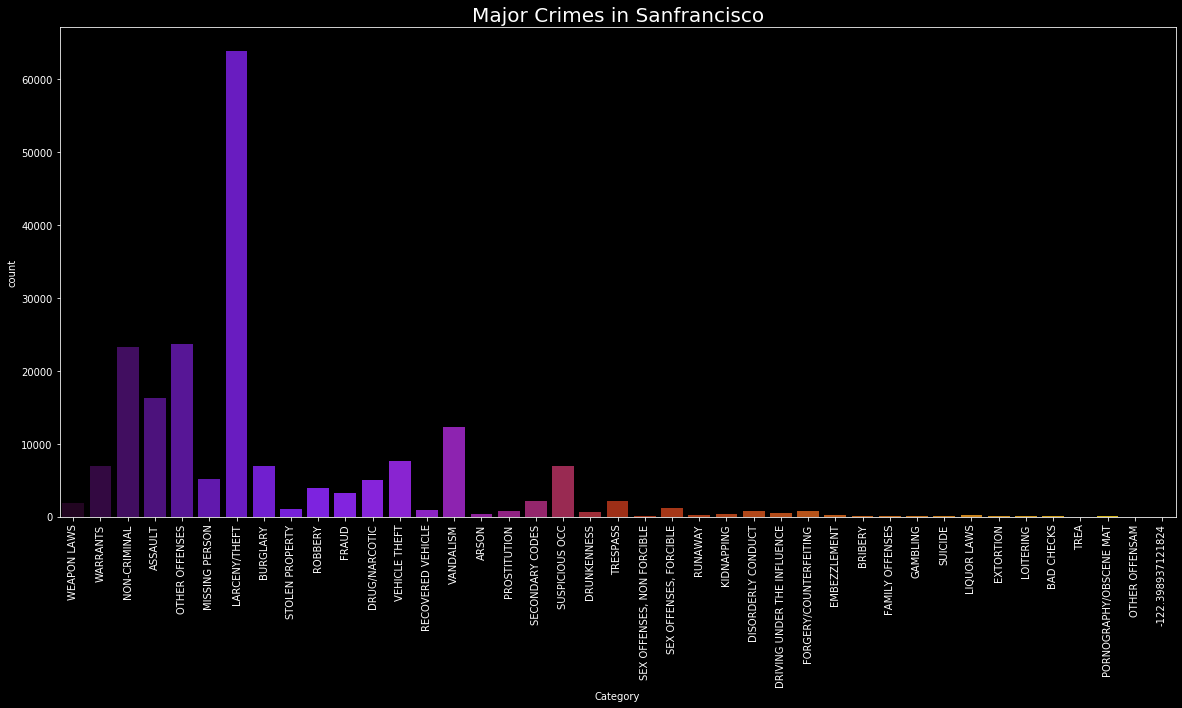

In [12]:
# different categories of crime

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['Category'], palette = 'gnuplot')
plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Description of the Crime**

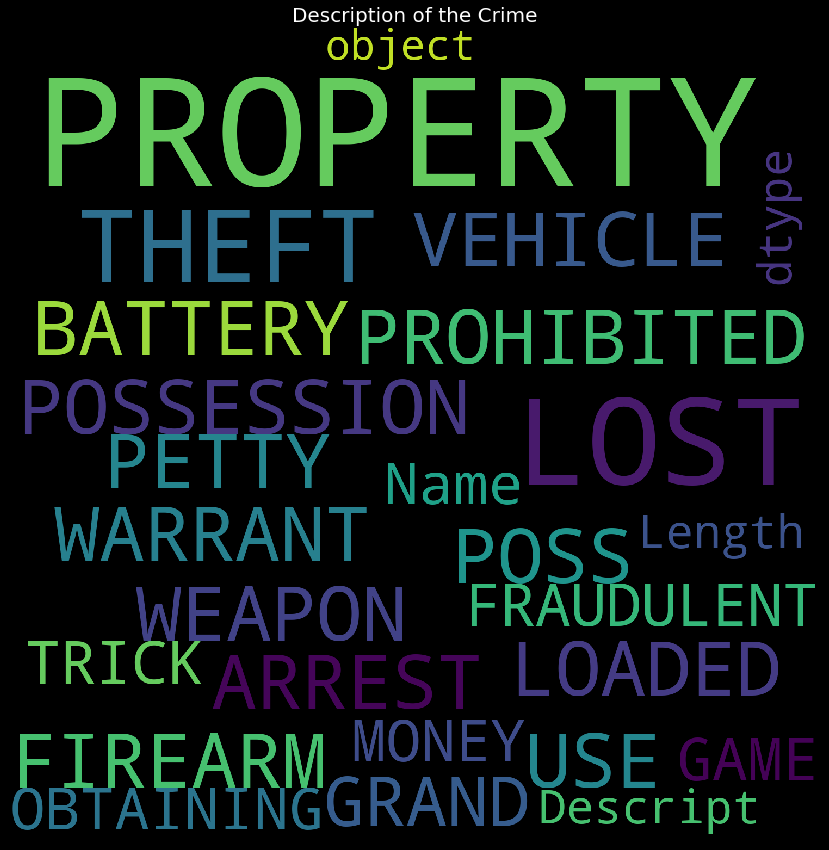

In [14]:
# description of the crime

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'black', width = 1500, height = 1500).generate(str(data['Descript']))
plt.title('Description of the Crime', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

**District with Most Crime**

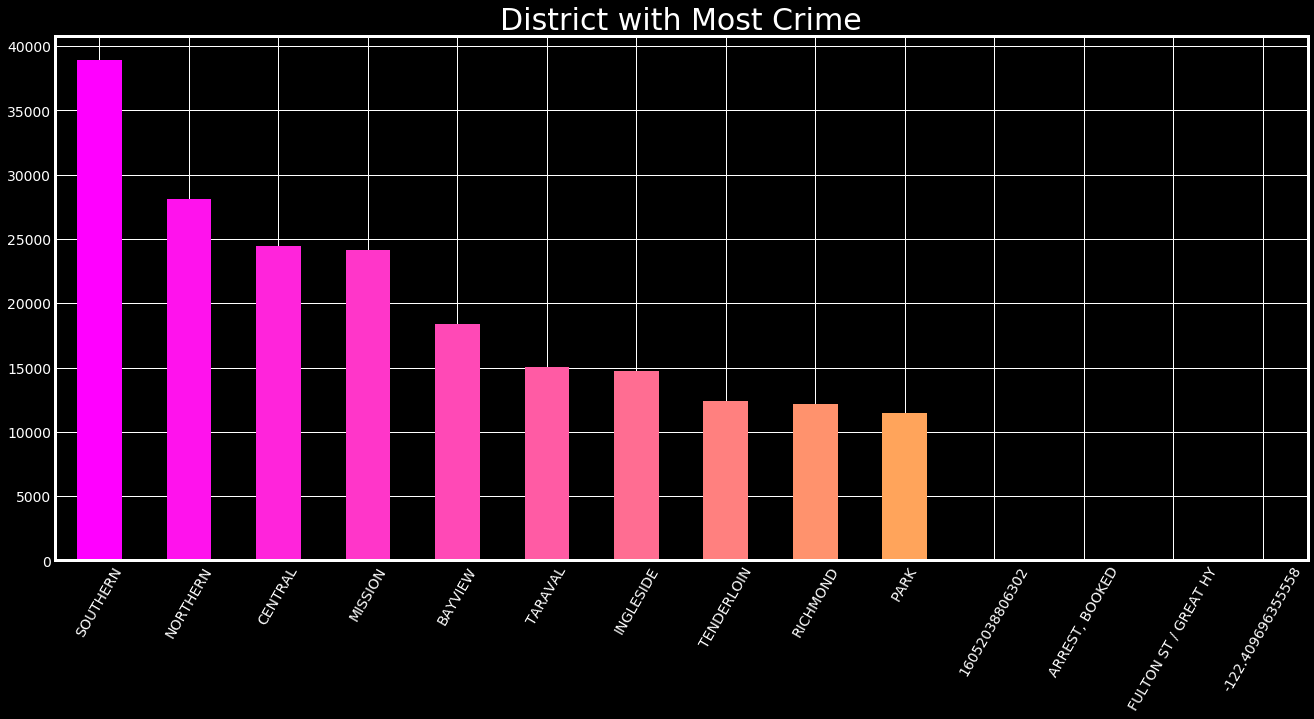

In [17]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['PdDistrict'].value_counts().plot.bar(color = color)

plt.title('District with Most Crime',fontsize = 30)
plt.xticks(rotation = 60)
plt.show()

**Top 15 Addresses in Sanfrancisco in Crime**

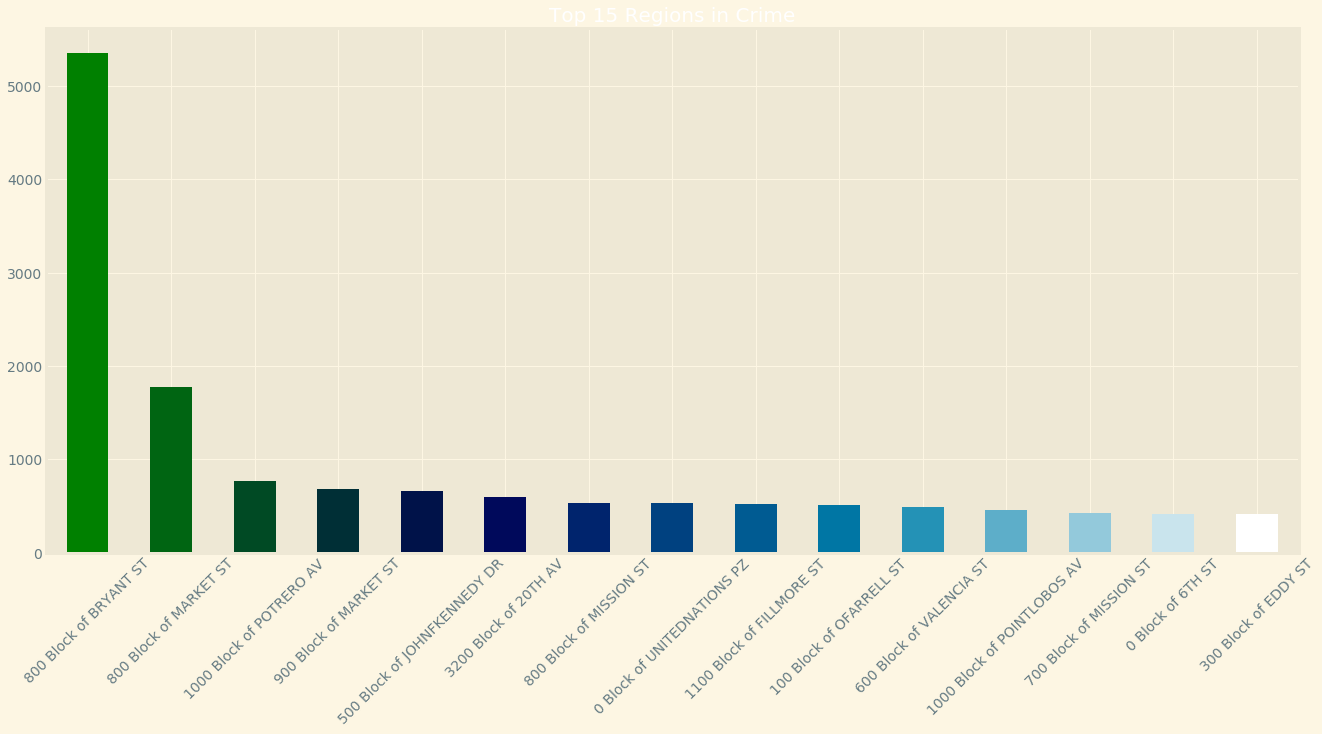

In [18]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['Address'].value_counts().head(15).plot.bar(color = color)

plt.title('Top 15 Regions in Crime',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

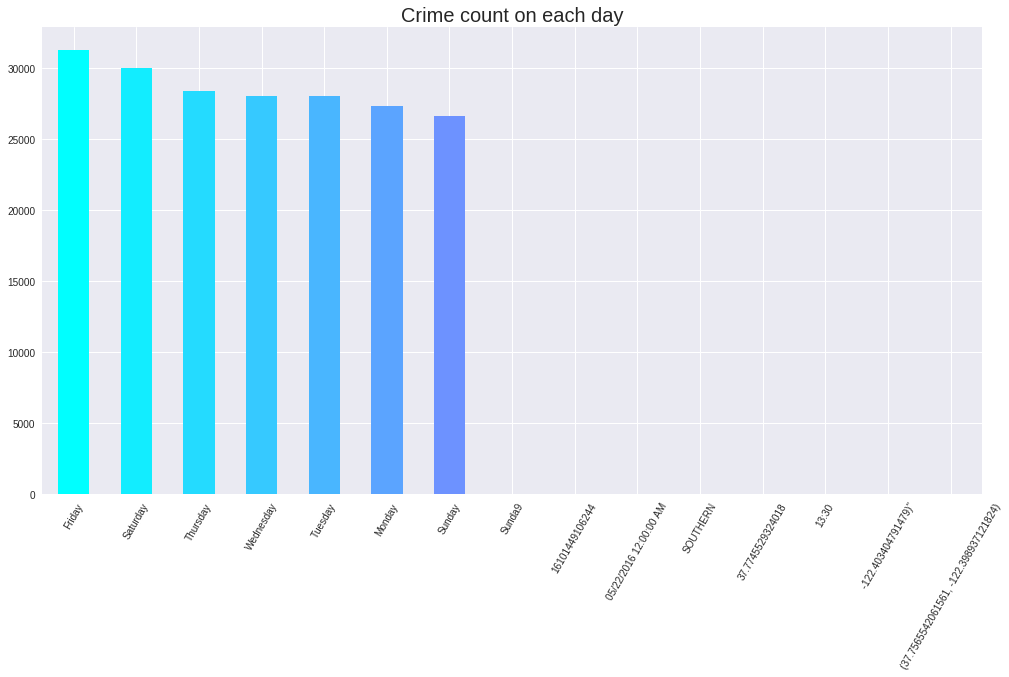

In [20]:
# Regions with count of crimes

plt.style.use('seaborn')

color = plt.cm.cool(np.linspace(0, 1, 15))
data['DayOfWeek'].value_counts().head(15).plot.bar(color = color, figsize = (15, 8))

plt.title('Crime count on each day',fontsize = 20)
plt.xticks(rotation = 60)
plt.show()

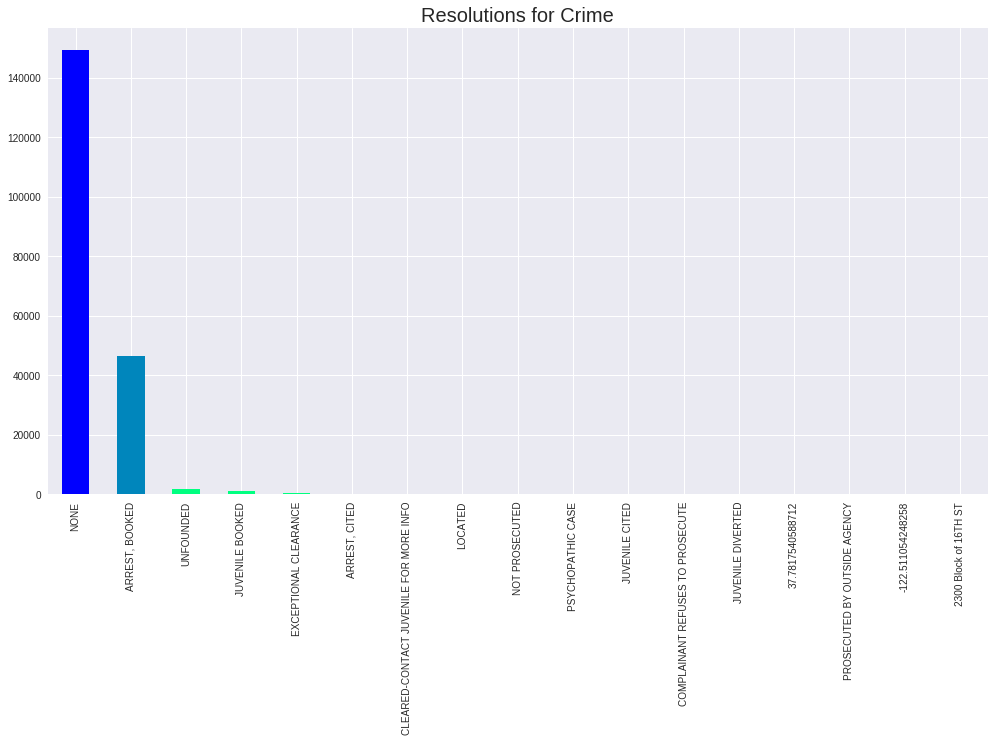

In [22]:
# Regions with count of crimes

plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 10, 20))
data['Resolution'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Resolutions for Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

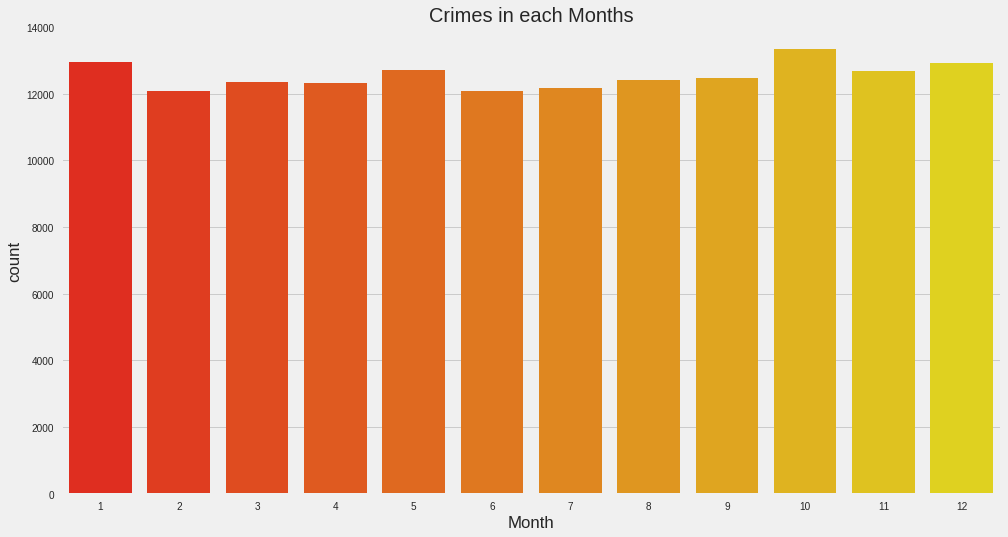

In [0]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['Month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)
plt.show()

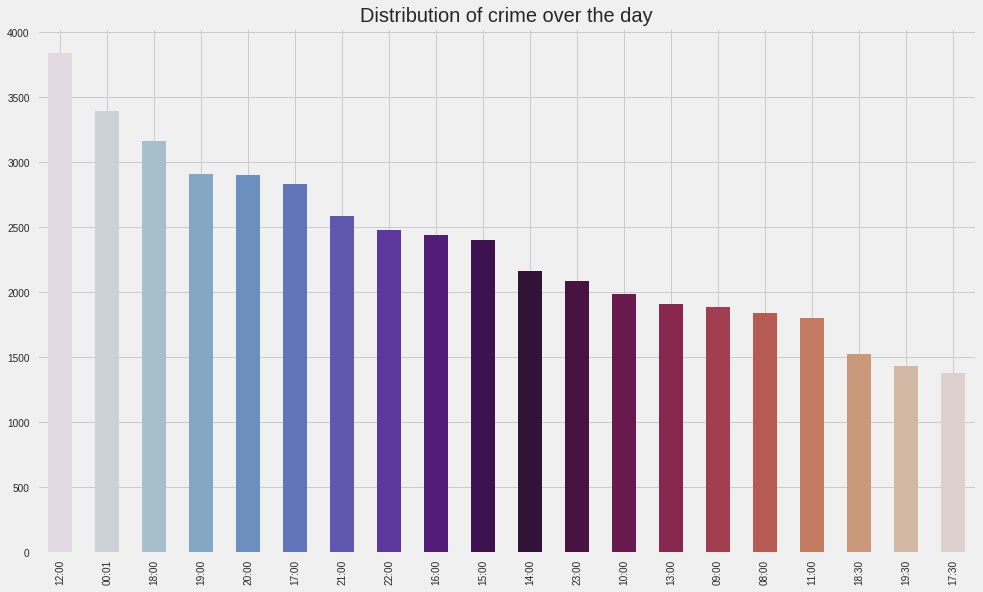

In [0]:
# checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
data['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

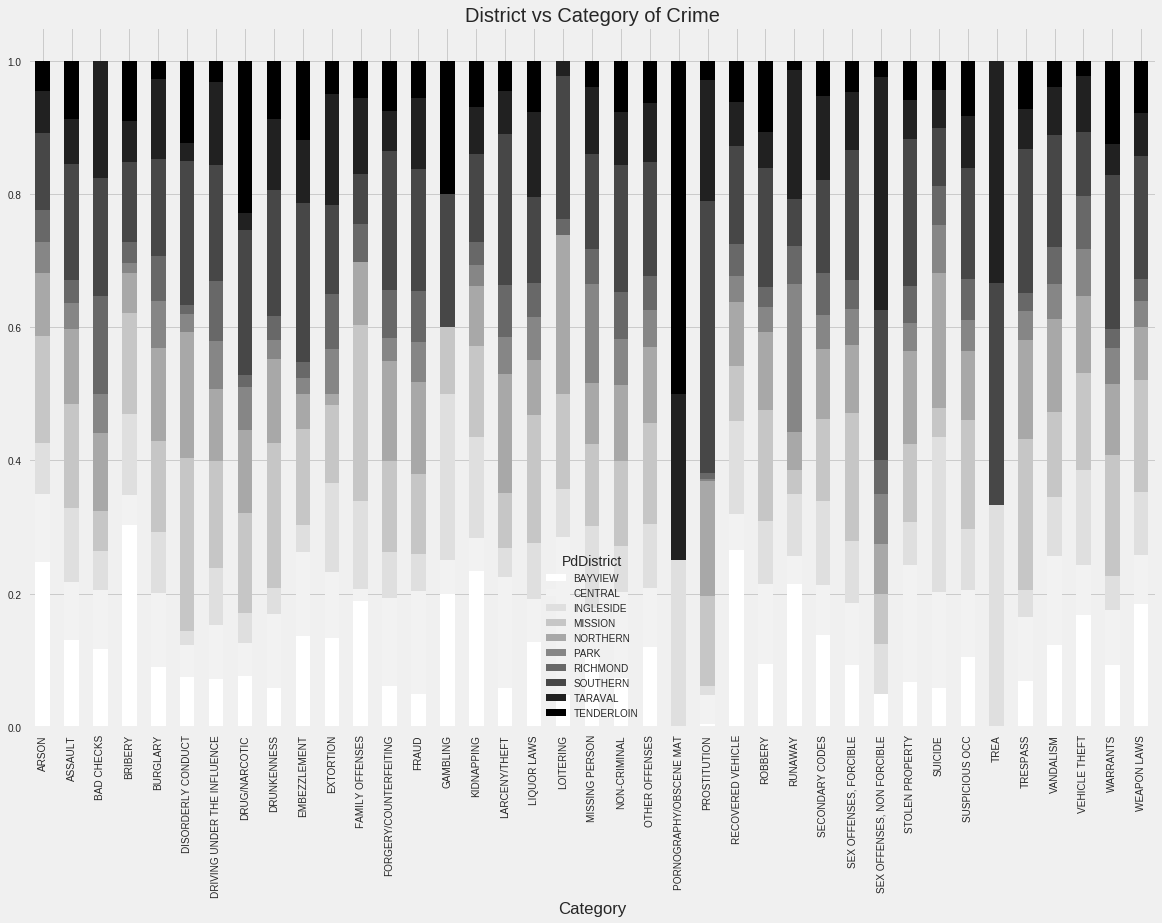

In [0]:

df = pd.crosstab(data['Category'], data['PdDistrict'])
color = plt.cm.Greys(np.linspace(0, 1, 10))
df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()